   # CASE STUDY: CUSTOMER ANALYSIS FOR RETAIL

In [2]:
# Import the necessary libraries (pandas, numpy)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [3]:
# Reading the files 

Customers = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv')
Product = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv')
Transactions = pd.read_csv(r'C:\Users\91896\OneDrive\Desktop\AnalytixLabs\PYTHON ASSIGNMENT AND CASE STUDIES\PYTHON CASE STUDIES\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv')

## Exploratory Data Analysis

In [4]:
Transactions.shape

(23053, 10)

In [5]:
Customers.shape

(5647, 4)

In [6]:
Product.shape

(23, 4)

In [7]:
Customers.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [8]:
Product.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [9]:
Transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [10]:
# Renaming 'prod_sub_cat_code' column of " Product table" to same as of 'prod_subcat_code' column of 'Transaction table'
# for merging both tables easily
Product.rename(columns= {'prod_sub_cat_code':'prod_subcat_code'}, inplace = True)

In [11]:
# Renamed product column
Product.head(2)

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women



### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [12]:
 Customer_Final = pd.merge( left=Customers, right=Transactions, left_on='customer_Id', right_on='cust_id', how='inner').merge(Product, left_on=['prod_subcat_code','prod_cat_code'], right_on=['prod_subcat_code','prod_cat_code'])

In [13]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [14]:
# null values are there in gender and city code
Customer_Final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [15]:
# converting "DOB" and "tran_date" from object dtype to dates
Customer_Final['DOB'] = pd.to_datetime(Customer_Final.DOB, format='%d-%m-%Y')

In [16]:
Customer_Final['DOB'].head()

0   1970-01-02
1   1970-01-16
2   1970-01-18
3   1970-01-22
4   1970-01-29
Name: DOB, dtype: datetime64[ns]

In [19]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date )

C:\Users\91896\AppData\Local\Temp\ipykernel_16388\1731255885.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final['tran_date'] = pd.to_datetime(Customer_Final.tran_date )


In [20]:
Customer_Final['tran_date'].head()

0   2014-01-13
1   2011-03-25
2   2011-05-23
3   2013-09-12
4   2013-05-23
Name: tran_date, dtype: datetime64[ns]

In [21]:
# check datatype and columns of Customer_Final table
# now datatype has been changed

Customer_Final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

#### Checking for duplicate values

In [22]:
# 13 duplicates are there in the dataset
Customer_Final.duplicated().sum()

13

In [23]:
# dropping duplicate rows
Customer_Final.drop_duplicates(inplace= True)

In [24]:
# no duplicates left
Customer_Final.duplicated().sum()

0

### 2. Prepare a summary report for the merged data set.
### a. Get the column names and their corresponding data types


In [25]:
#column names of "Customer_Final" dataframe

Customer_Final.columns


Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [28]:
# Datatypes of all columns of "Customer_Final" dataframe

# Customer_Final.info()    # method -1
Customer_Final.dtypes   # method -2

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

### b. Top/Bottom 10 observations


In [29]:
# top 10 observations

Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-02-01,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-02-01,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [30]:
# Bottom 10 observations

Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [31]:
# 25% - Q1 , 50% - Q2(median), 75% - Q3

Customer_Final.describe().loc[['min','25%','50%','75%','max'],:]

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
min,266783.00,1.0,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925
25%,268935.00,3.0,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450
50%,270980.50,5.0,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950
75%,273114.25,8.0,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255
max,275265.00,10.0,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500


### d. Frequency tables for all the categorical variables

In [32]:
Customer_Final.describe(include='object')

,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [34]:
Categorical_df = Customer_Final.select_dtypes(include='object')
Numerical_df = Customer_Final.select_dtypes(include=['int64','float64'])

In [35]:
Numerical_df.columns

Index(['customer_Id', 'city_code', 'transaction_id', 'cust_id',
       'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'],
      dtype='object')

In [36]:
Categorical_df.columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

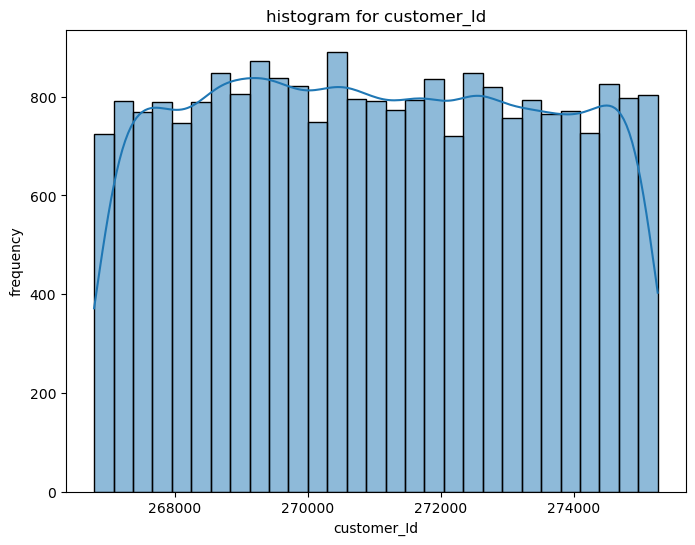

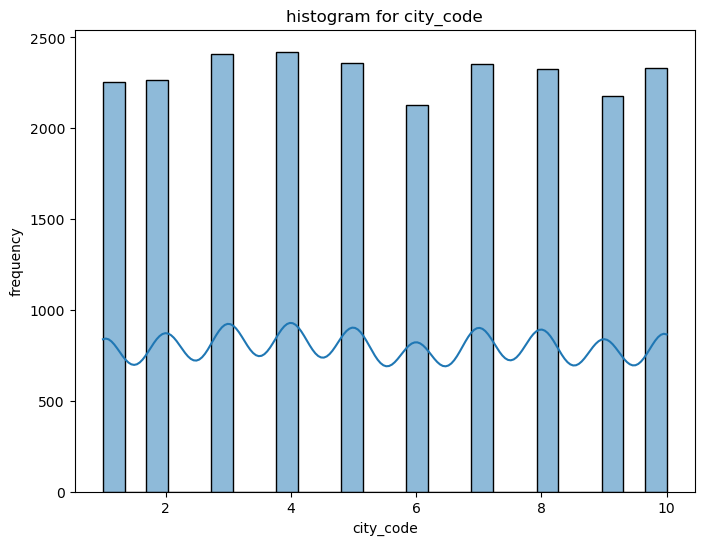

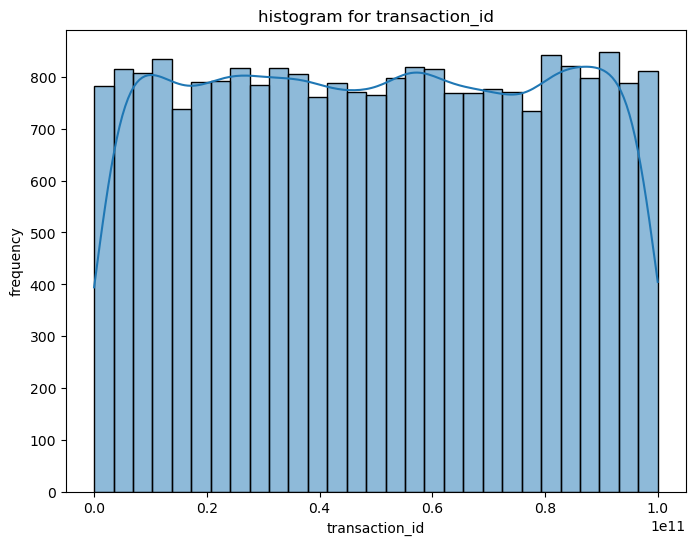

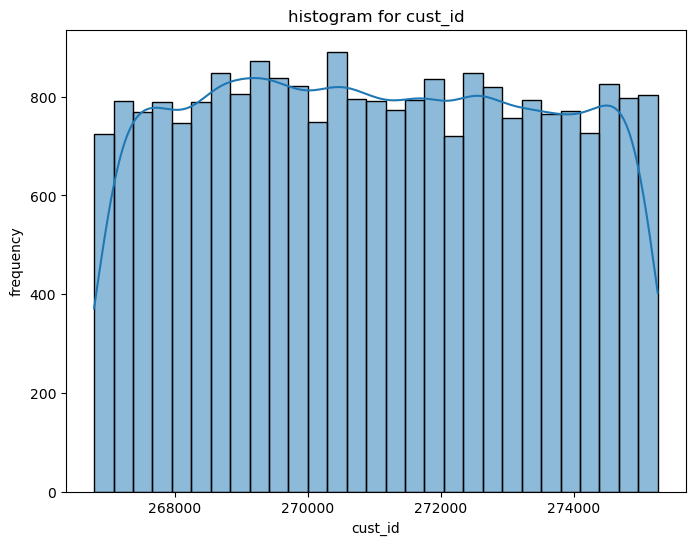

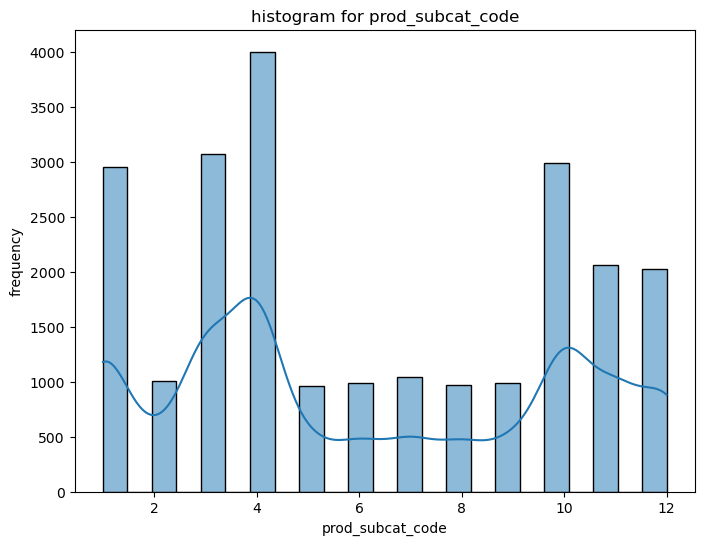

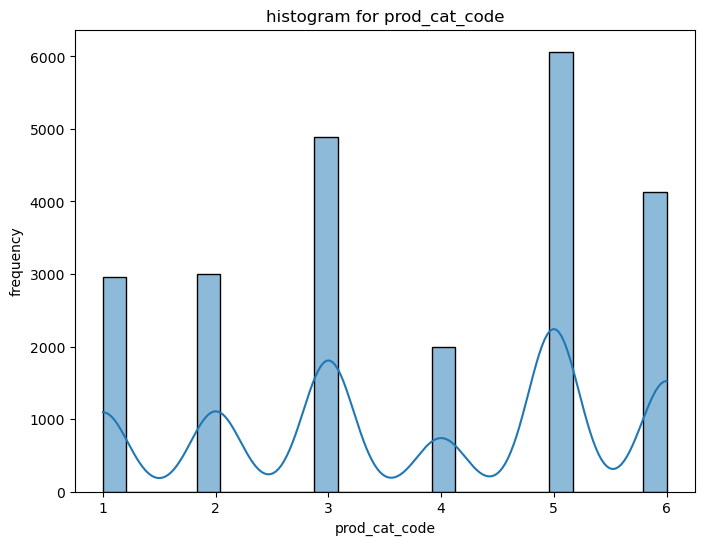

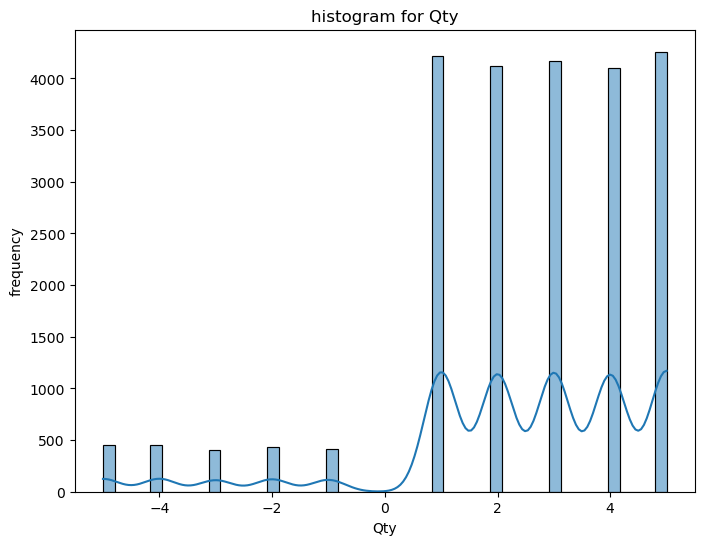

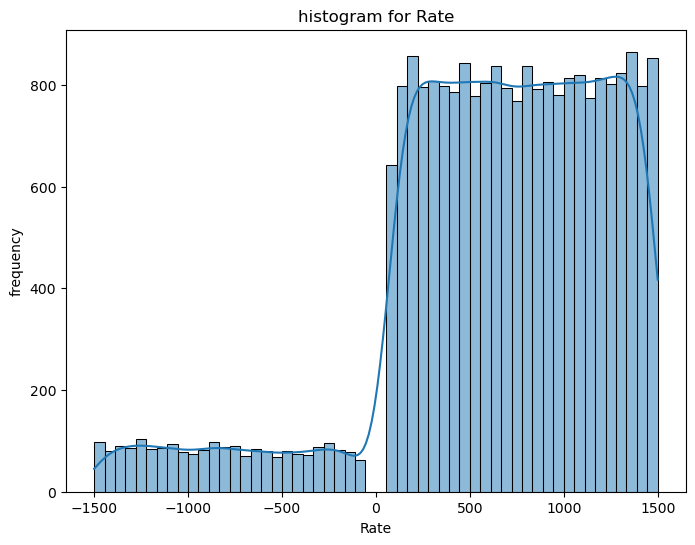

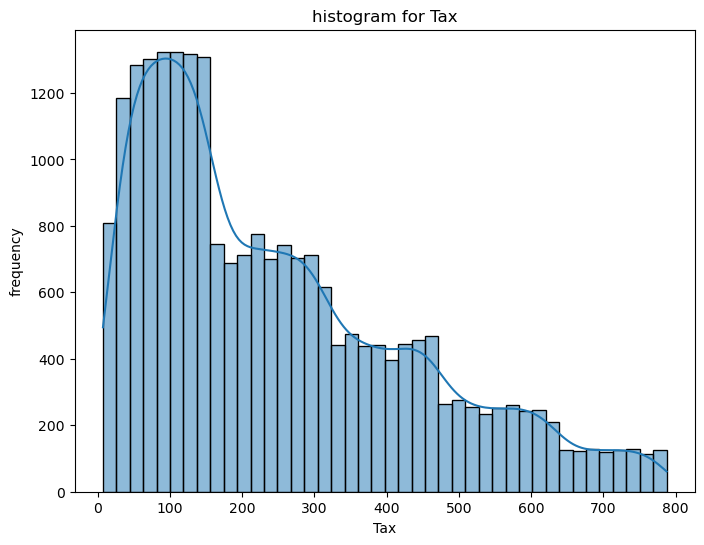

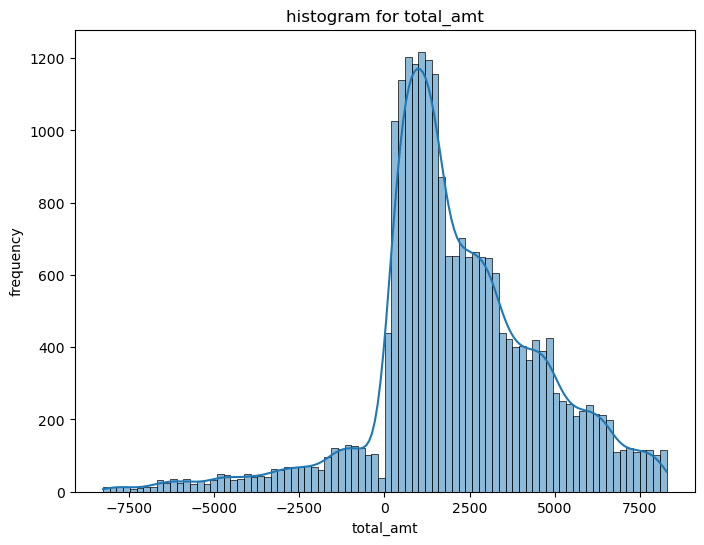

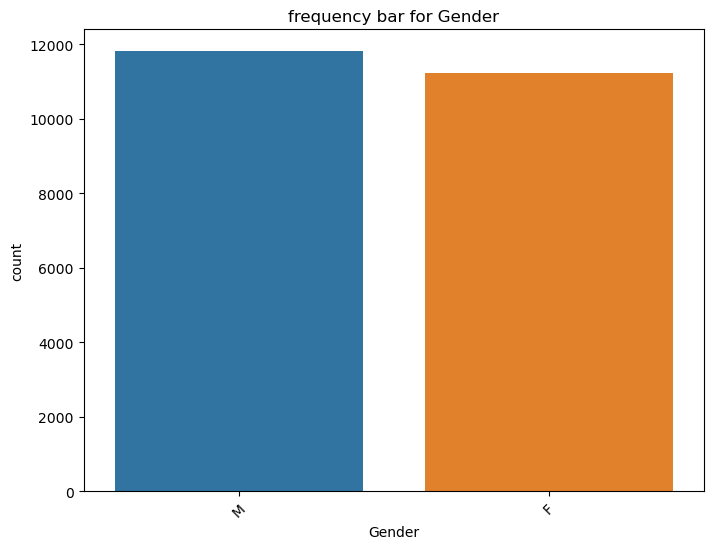

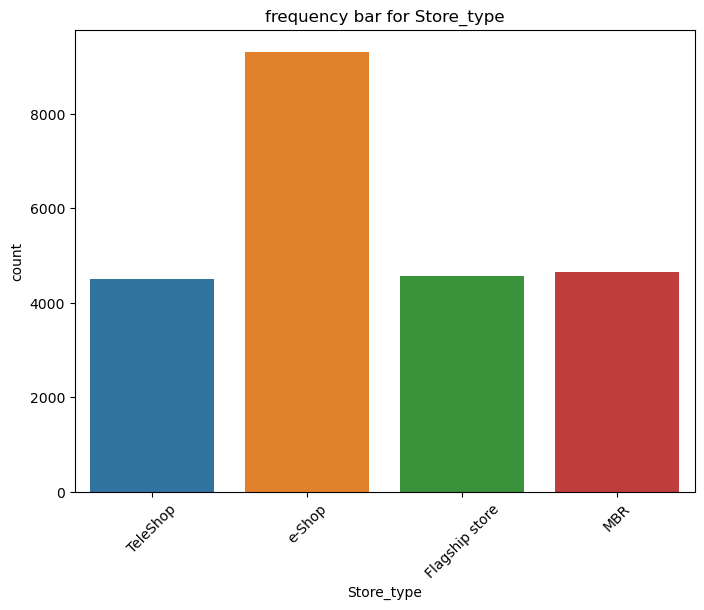

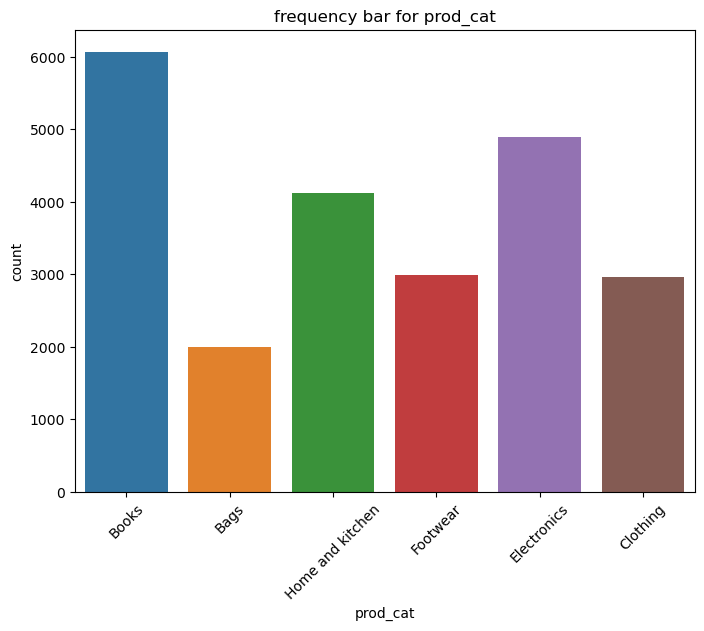

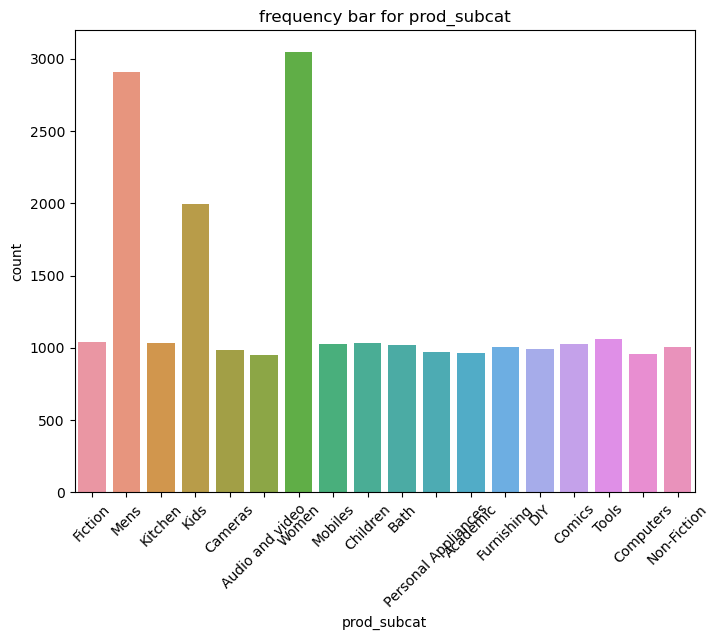

In [37]:
# using Numerical_df and Categorical_df columns for looping over series
# generate a histogram for continuous variables

for var in Numerical_df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(Customer_Final[var],kde= True)
    plt.title(f'histogram for {var}')
    plt.ylabel('frequency')
    plt.show()
    

# Generate frequency bars for categorical variables
for var in Categorical_df.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data= Customer_Final, x=var)
    plt.title(f'frequency bar for {var}')
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability if needed
    plt.show()


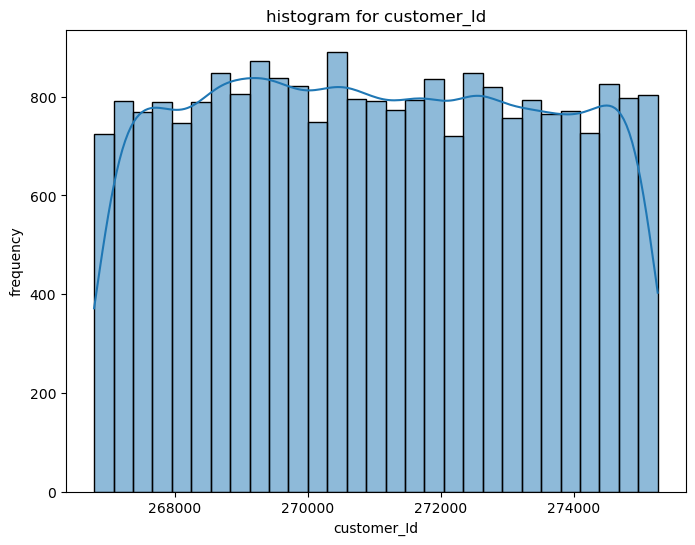

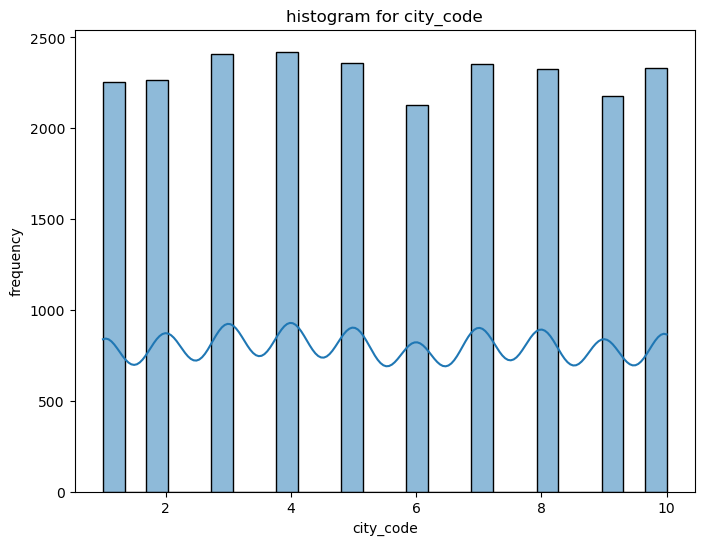

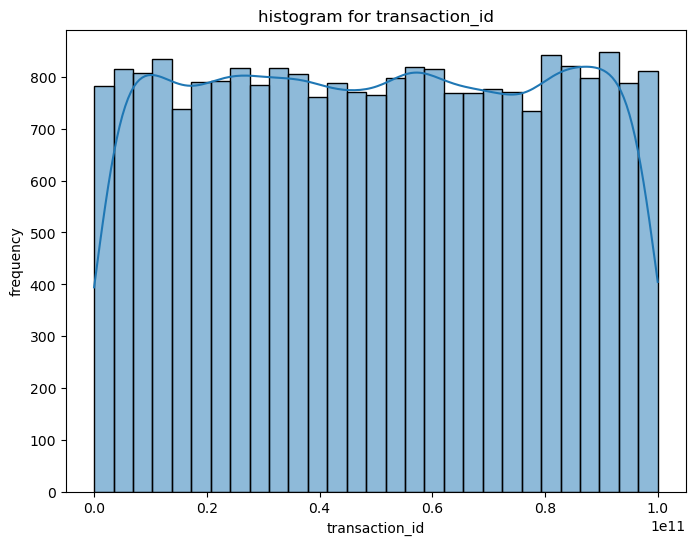

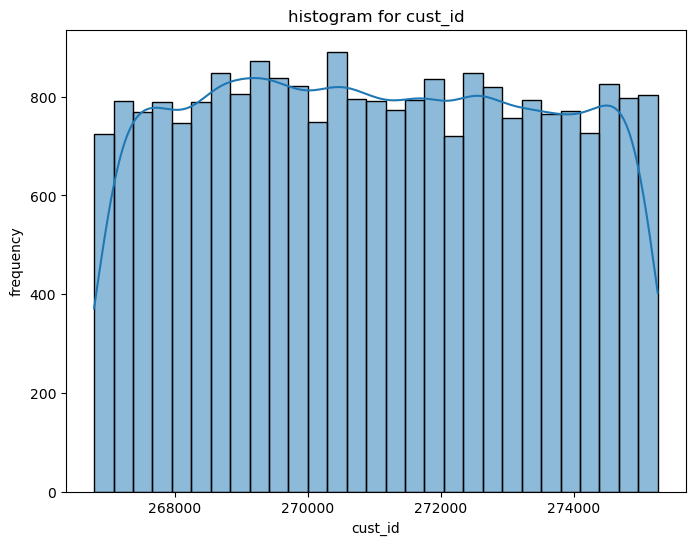

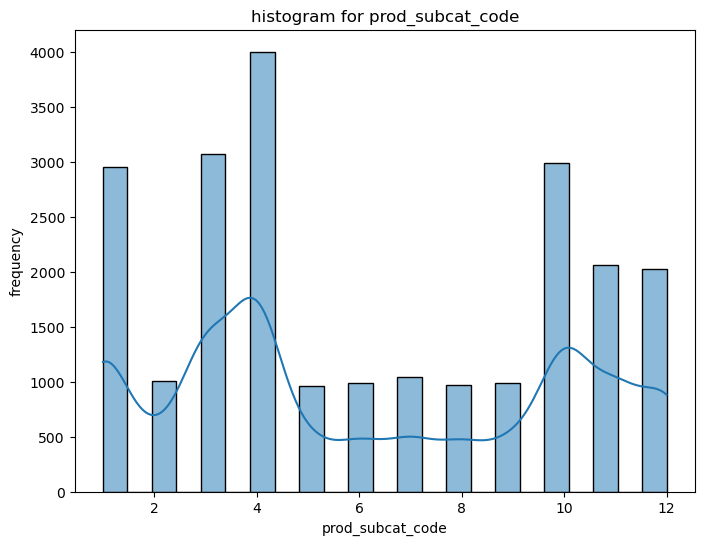

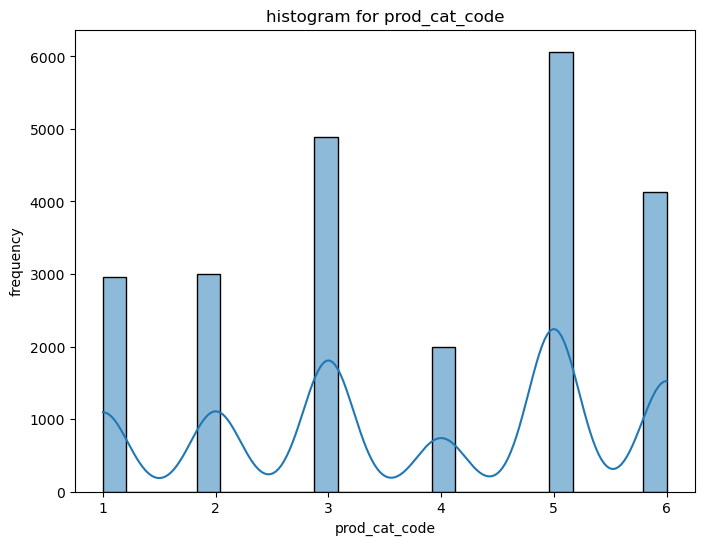

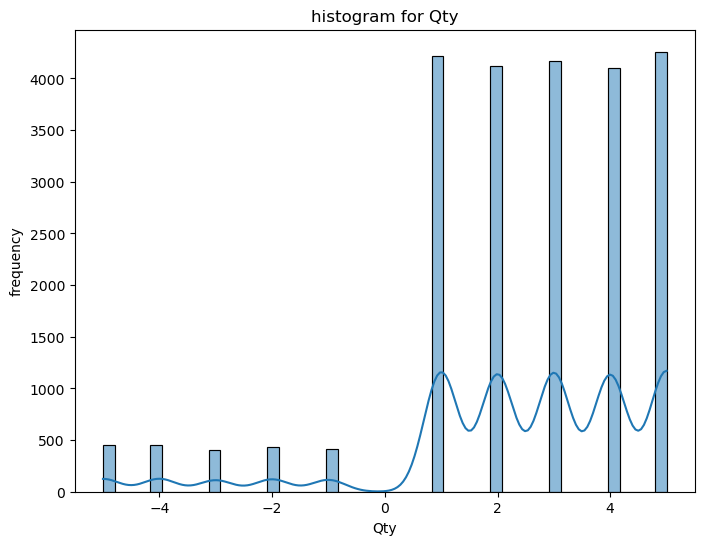

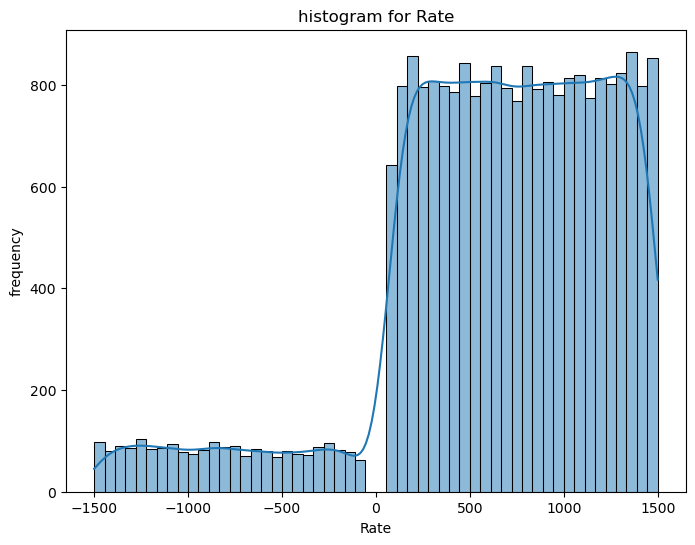

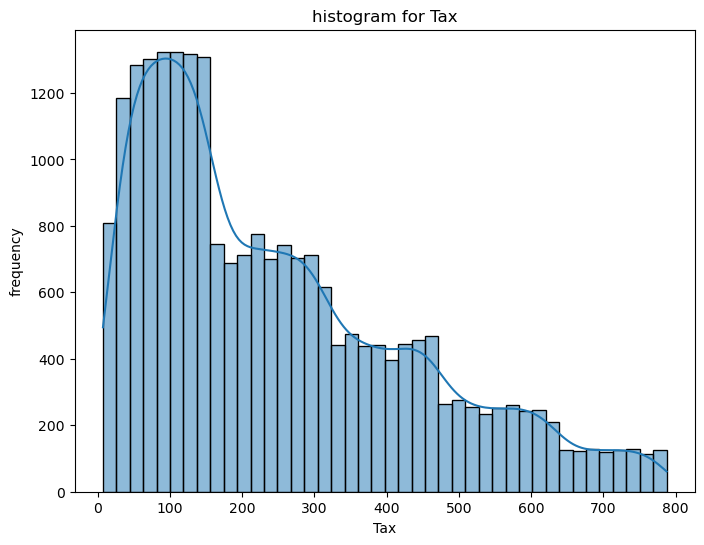

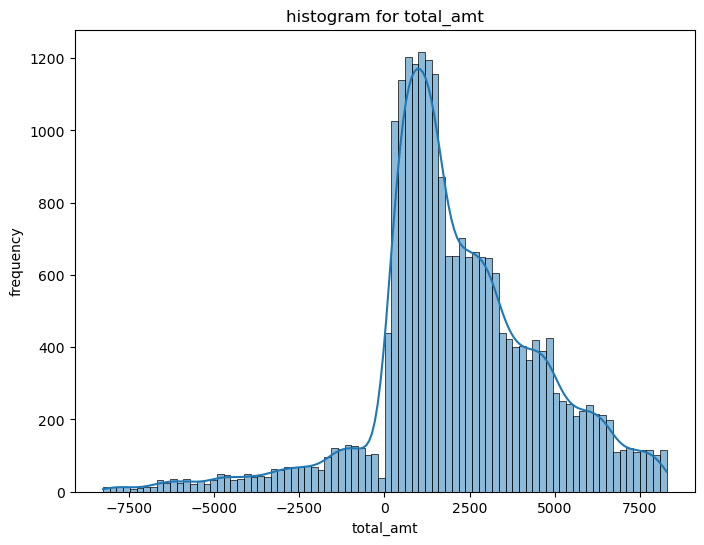

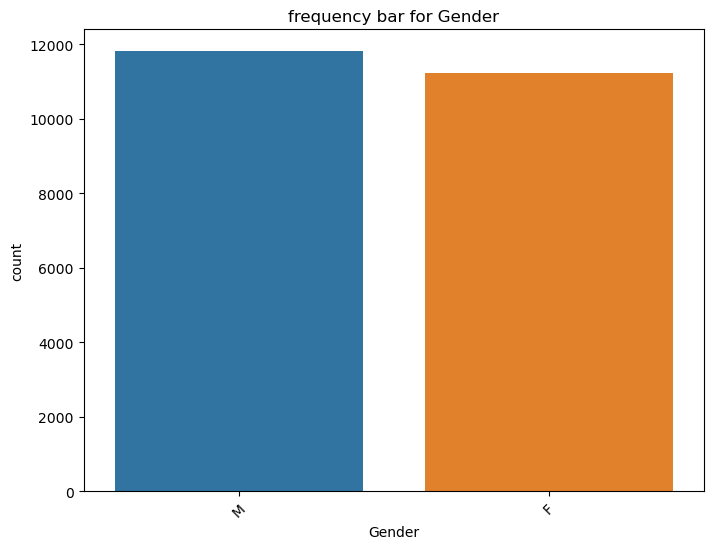

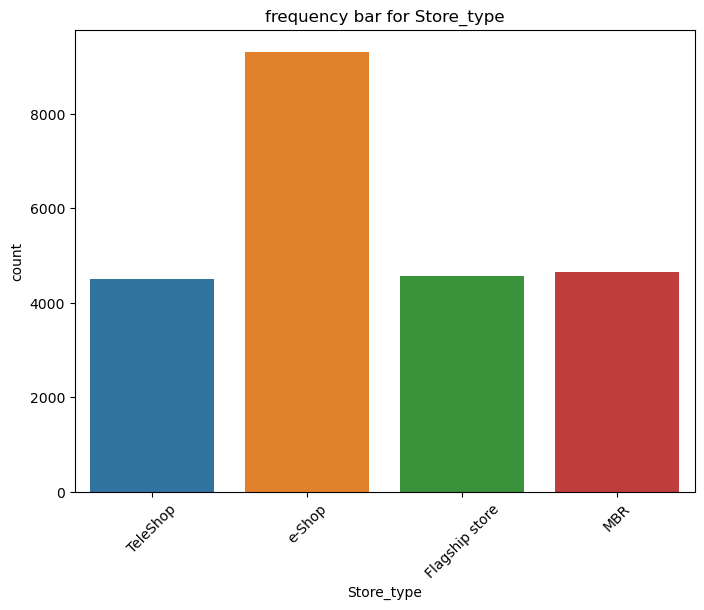

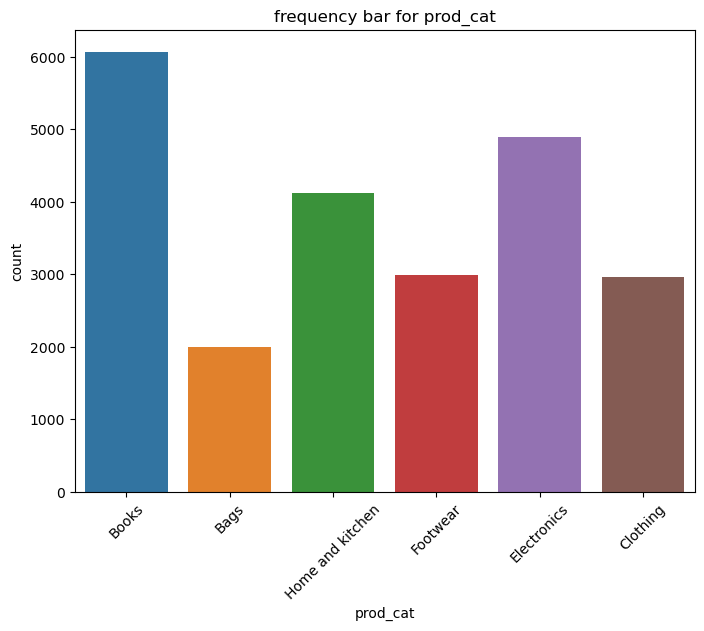

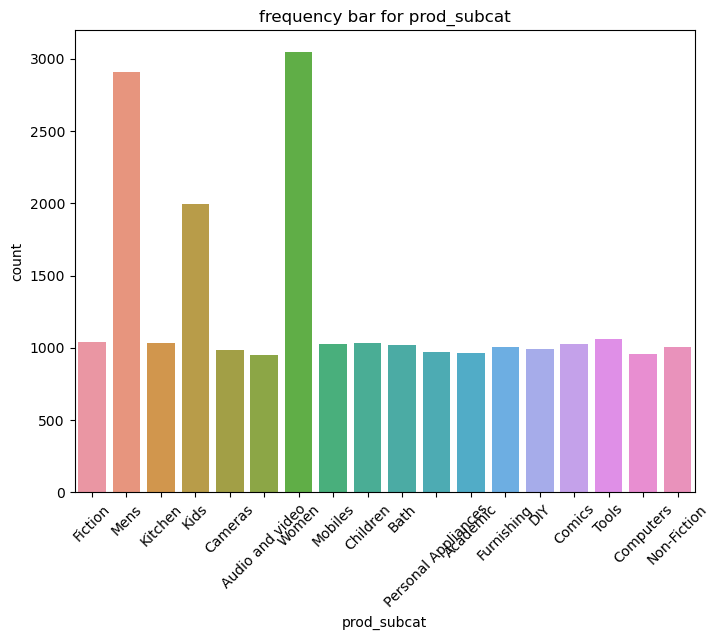

In [38]:
# just passing list of variables and looping over
# Assuming you have a list of categorical variables
categorical_vars = ['Gender', 'Store_type', 'prod_cat', 'prod_subcat']

# Assuming you have a list of continuous variables
continuous_vars = ['customer_Id', 'city_code', 'transaction_id', 'cust_id',
       'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']

# generate a histogram for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(8,6))
    sns.histplot(Customer_Final[var], kde=True)
    plt.title(f'histogram for {var}')
    plt.ylabel('frequency')
    plt.show()
    

# Generate frequency bars for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8,6))
    sns.countplot(data= Customer_Final, x=var)
    plt.title(f'frequency bar for {var}')
    plt.xticks(rotation=45)   # Rotate x-axis labels for better readability if needed
    plt.show()


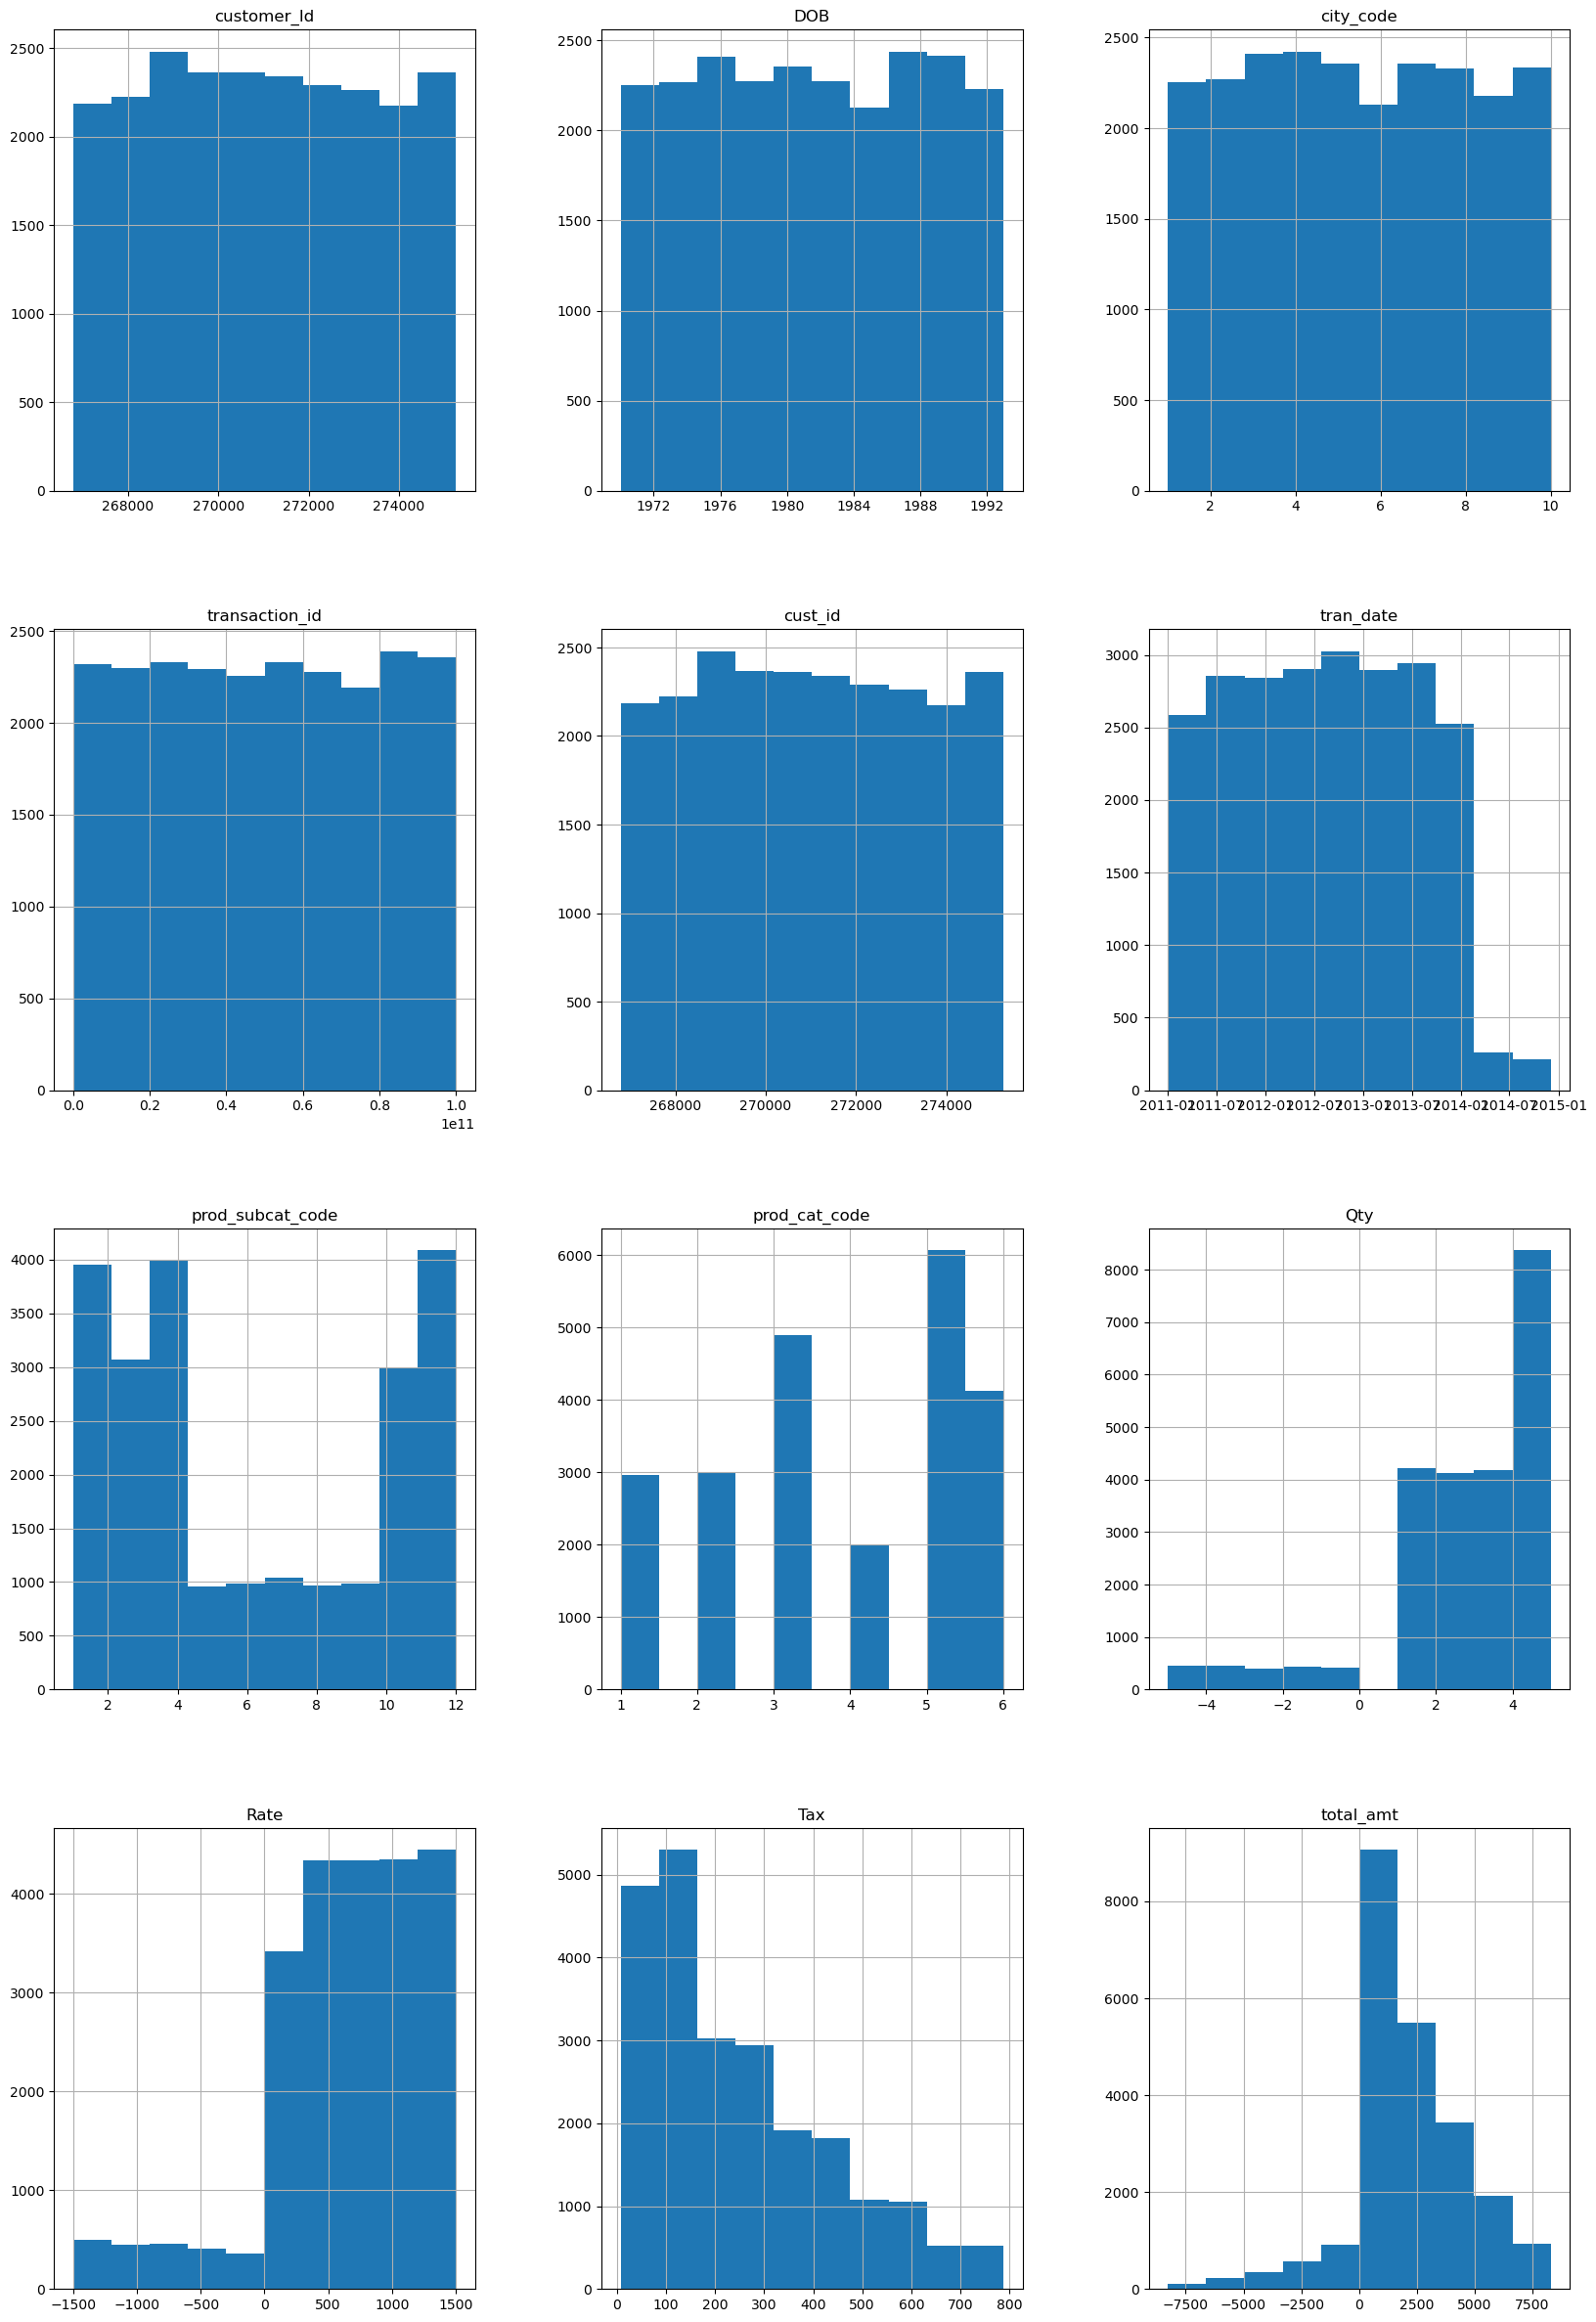

In [39]:
# histogram for numerical variable
Customer_Final.hist(figsize=(20,30))
plt.tight_layout
plt.show()

### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data


In [40]:
max_date = Customer_Final.tran_date.max()

In [41]:
min_date = Customer_Final.tran_date.min()

In [42]:

Customer_Final.tran_date.max()-Customer_Final.tran_date.min()

Timedelta('1430 days 00:00:00')

In [43]:
print('Timeperiod of available transaction date is from ' + pd.Timestamp.strftime(min_date,format='%d-%m-%Y') +' to ' +pd.Timestamp.strftime(max_date,format='%d-%m-%Y'))

Timeperiod of available transaction date is from 02-01-2011 to 02-12-2014


### b. Count of transactions where the total amount of transaction was negative

In [44]:
#count of transaction_ids where total_amt is negative  # method - 1

Negative_Transactions = Customer_Final.transaction_id[Customer_Final.total_amt<0].count()
Negative_Transactions

2164

In [45]:
# USING LOC METHOD --- # method - 2

Customer_Final.loc[Customer_Final["total_amt"] < 0,"transaction_id"].count()

2164

In [46]:
print(f'Count of transactions where the total amount of transaction was negative is : {Negative_Transactions}')

Count of transactions where the total amount of transaction was negative is : 2164


### 5. Analyze which product categories are more popular among females vs male customers.

In [47]:
# using pivot table - WE GET WIDE FORMAT

Customer_Final.pivot_table(index='Gender', columns='prod_cat' ,values='Qty', aggfunc='sum' )

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


In [48]:
# using group by -- WE GET LONG FORMAT

Customer_Final.groupby(by=['Gender','prod_cat'])[['Qty']].agg('sum').sort_values(by=['Qty'], ascending=False)

,,Qty
Gender,prod_cat,
M,Books,7587
F,Books,7080
M,Electronics,6486
F,Electronics,5832
M,Home and kitchen,5051
F,Home and kitchen,4898
M,Clothing,3748
F,Footwear,3721
M,Footwear,3561


*Products that are popular among both males and females are : Books, Electronics,Home and kitchen and Footwear* 

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [52]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [53]:
# Calculate the number of unique customers per city & sorting will get the maximum unique customers

city_cust_count = Customer_Final.groupby(by=['city_code'])[['customer_Id']].nunique().sort_values(by ='customer_Id',ascending = False)
city_cust_count['perc'] = city_cust_count.apply(lambda row: (row['customer_Id']/city_cust_count['customer_Id'].sum())*100, axis=1 )
city_cust_count


,customer_Id,perc
city_code,,
3.0,576,10.465116
5.0,570,10.356105
4.0,569,10.337936
7.0,563,10.228924
8.0,551,10.010901
2.0,546,9.920058
10.0,546,9.920058
1.0,535,9.720203
9.0,532,9.665698


In [54]:
# Find the city code with the maximum unique customers

city_max_cust = city_cust_count.idxmax()
city_max_cust

customer_Id    3.0
perc           3.0
dtype: float64

In [55]:
city_max_cust[0]

3.0

In [56]:
# Get the count of unique customers from the city with the maximum unique customers

city_cust_count.iloc[0,0]

576

In [57]:
# Calculate the total number of unique customers

city_cust_count.customer_Id.sum()

5504

In [58]:
# Calculate the percentage of unique customers from the city with the maximum unique customers

percentage_of_unique_customers = round((city_cust_count.iloc[0,0]/city_cust_count.customer_Id.sum())*100,2)
percentage_of_unique_customers

10.47

In [59]:
print(f"City code with the maximum unique customers: {city_max_cust[0]}")
print(f'percentage of unique customers from that city: {percentage_of_unique_customers}')

City code with the maximum unique customers: 3.0
percentage of unique customers from that city: 10.47


### 7. Which store type sells the maximum products by value and by quantity?

In [60]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [62]:
Customer_Final.groupby(by=['Store_type'])[['Qty','Rate']].sum().sort_values(by='Qty', ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


*e-Shop store type sells the maximum products by value and by quantity*

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [63]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [64]:
store_group = Customer_Final.pivot_table(index='Store_type', columns='prod_cat', values='total_amt', aggfunc= 'sum')
store_group

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.835,2493677.810,1194423.230,2215136.040,1234806.560,1713004.150
MBR,848678.675,2496039.195,1287686.335,2107969.825,1112163.715,1822403.570
TeleShop,789181.055,2545714.470,1241834.360,1978457.195,1235719.290,1581227.375
e-Shop,1617933.265,5297161.155,2527193.565,4429142.770,2643215.250,3327977.120


In [65]:
store_group.loc['Flagship store',['Electronics','Clothing']]

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [66]:
store_group.loc['Flagship store',['Electronics','Clothing']].sum()

3409559.27

*Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is 3409559.27*

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [67]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction


In [68]:
gender_group = Customer_Final.pivot_table(index='prod_cat', columns='Gender', values='total_amt', aggfunc= 'sum')
gender_group

Gender,F,M
prod_cat,,
Bags,2079618.840,2046722.990
Books,6174590.825,6645972.775
Clothing,3026750.805,3224079.495
Electronics,5019354.210,5711351.620
Footwear,3203155.215,3020200.365
Home and kitchen,4133702.235,4305169.505


In [69]:
gender_group.loc['Electronics','M']

5711351.62

 *Total amount earned from "Male" customers under the "Electronics" category is 5711351.62*

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [70]:
# transactions which are positive means (>0)

Positive_Transactions = Customer_Final[Customer_Final.total_amt>0]
Positive_Transactions

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23047,272141,1992-12-02,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction


In [71]:
# count of unique transaction id by customers

unique_trans = Customer_Final.groupby(by= 'customer_Id')[['transaction_id']].nunique() 
unique_trans 

,transaction_id
customer_Id,
266783,4
266784,3
266785,7
266788,4
266794,11
...,...
275257,4
275261,3
275262,2


In [72]:
# customers having more than 10 unique transactions

unique_trans[unique_trans['transaction_id']> 10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


*6 customers have more than 10 unique transactions*

### 11. For all customers aged between 25 - 35, find out:
### a. What was the total amount spent for “Electronics” and “Books” product categories?


In [73]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction


In [74]:
# Adding a new column age using lambda function and 
# checking the DOB column to handle cases where the calculated age might be incorrect if the birthdate is in the future. 

today = dt.datetime.today()
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB']< today , Customer_Final['DOB']-np.timedelta64(100, 'Y') )
Customer_Final['Age'] = Customer_Final['DOB'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [75]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,53


*we have to deal with customers aged between 25-35, so creating new column Age_Cat by forming bins*

In [76]:
Customer_Final['Age_Cat'] = pd.cut(x= Customer_Final['Age'], bins= [25,35,45,55], labels= ['25-35','36-45','46-55'])

In [77]:
Customer_Final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,Age_Cat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,53,46-55
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,53,46-55
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,53,46-55


In [78]:
# grouping the dataframe on the basis of 'Age_Cat' and 'prod_cat'


Customer_25_35 = Customer_Final.pivot_table(index= 'Age_Cat', columns= ['prod_cat'], values= 'total_amt', aggfunc= 'sum')
Customer_25_35

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Age_Cat,,,,,,
25-35,930838.740,2840878.755,1549215.525,2531393.670,1528147.595,2018388.580
36-45,1738952.865,5544680.050,2812326.660,4637376.705,2711955.090,3687528.650
46-55,1456550.225,4447033.825,1889595.305,3561935.455,1985802.130,2738694.985


In [79]:
# Total amount spent for “Electronics” and “Books” product categories, for customers aged between 25-35 

Customer_25_35.loc['25-35', ['Electronics','Books']].sum()

5372272.425

*So Total amount spent for “Electronics” and “Books” product categories, for customers aged between 25-35 is 5372272.425*

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [80]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,Age_Cat
0,268408,1970-01-02,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,53,46-55
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,53,46-55
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,53,46-55
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,53,46-55
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,53,46-55


In [81]:
# Customers aged between 25-35 , total spends
# filtering out data that belongs to the 'age_cat' = 25-35

Customer_total_25_35 = Customer_Final[Customer_Final['Age_Cat'] == '25-35']
Customer_total_25_35

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,Age_Cat
803,274359,1987-09-08,F,7.0,33811387652,274359,2013-06-22,7,5,1,1484,155.820,1639.820,MBR,Books,Fiction,35,25-35
804,274923,1987-09-08,M,8.0,97988621875,274923,2014-03-02,7,5,3,837,263.655,2774.655,e-Shop,Books,Fiction,35,25-35
805,274923,1987-09-08,M,8.0,21647178150,274923,2014-01-29,7,5,5,812,426.300,4486.300,Flagship store,Books,Fiction,35,25-35
806,274923,1987-09-08,M,8.0,10161887385,274923,2011-03-04,7,5,5,934,490.350,5160.350,e-Shop,Books,Fiction,35,25-35
807,275089,1987-09-10,F,3.0,17524250201,275089,2013-03-26,7,5,3,927,292.005,3073.005,MBR,Books,Fiction,35,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-12-04,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,30,25-35
23049,274618,1992-12-09,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,30,25-35
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,30,25-35
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,30,25-35


In [82]:
# getting the data of transactions between 1st Jan, 2014 to 1st Mar, 2014

Total_amount = Customer_total_25_35[(Customer_total_25_35.tran_date >= '2014-01-01') & (Customer_total_25_35.tran_date <= '2014-03-01')]
Total_amount

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,Age_Cat
805,274923,1987-09-08,M,8.0,21647178150,274923,2014-01-29,7,5,5,812,426.300,4486.300,Flagship store,Books,Fiction,35,25-35
849,273731,1988-07-28,F,7.0,194354511,273731,2014-01-20,7,5,4,551,231.420,2435.420,Flagship store,Books,Fiction,35,25-35
870,270535,1988-12-13,F,7.0,81750321697,270535,2014-01-17,7,5,1,1430,150.150,1580.150,e-Shop,Books,Fiction,34,25-35
889,273026,1989-04-21,M,10.0,46741038644,273026,2014-01-28,7,5,5,1163,610.575,6425.575,MBR,Books,Fiction,34,25-35
951,267864,1990-11-17,M,3.0,18062786609,267864,2014-03-01,7,5,3,623,196.245,2065.245,MBR,Books,Fiction,32,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22910,274000,1989-08-22,M,10.0,789912743,274000,2014-01-01,10,5,2,295,61.950,651.950,e-Shop,Books,Non-Fiction,34,25-35
22922,269637,1989-12-10,F,1.0,42879420828,269637,2014-01-14,10,5,1,778,81.690,859.690,MBR,Books,Non-Fiction,33,25-35
22934,269536,1990-03-21,M,5.0,32889219128,269536,2014-01-01,10,5,5,1423,747.075,7862.075,e-Shop,Books,Non-Fiction,33,25-35
22959,272165,1990-12-01,M,4.0,91039584326,272165,2014-02-01,10,5,1,1268,133.140,1401.140,e-Shop,Books,Non-Fiction,32,25-35


In [83]:
Total_amount.total_amt.sum()

401423.29500000004

*The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 401423.295*